In [3]:
import cmocean
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.ticker as mticker
import scipy as sp
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.size' : 11}
plt.rcParams.update(rc)

In [4]:
eps07 = np.load('eps07.npy')
eps1 = np.load('eps1.npy')
eps2 = np.load('eps2.npy')

chi07 = np.load('chi07.npy')
chi1 = np.load('chi1.npy')
chi2 = np.load('chi2.npy')

time07 = np.load('time07.npy')
time1 = np.load('time1.npy')
time2 = np.load('time2.npy')

In [5]:
timec = 0
chi07_cum = sp.integrate.cumtrapz(np.array(chi07)[timec:], time07[timec:])
eps07_cum = sp.integrate.cumtrapz(np.array(eps07)[timec:], time07[timec:])

chi1_cum = sp.integrate.cumtrapz(np.array(chi1)[timec:], time1[timec:])
eps1_cum = sp.integrate.cumtrapz(np.array(eps1)[timec:], time1[timec:])

chi2_cum = sp.integrate.cumtrapz(np.array(chi2)[timec:], time2[timec:])
eps2_cum = sp.integrate.cumtrapz(np.array(eps2)[timec:], time2[timec:])

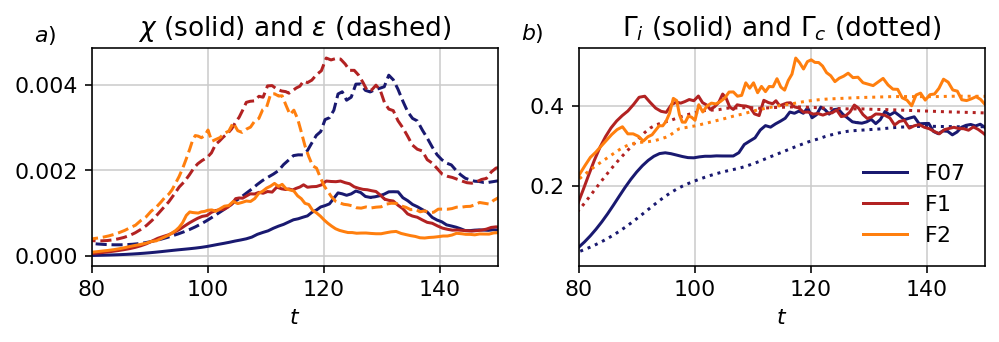

In [6]:
fig, axs = plt.subplots(1,2, figsize=(8,2))
axs[0].plot(time07, 2*np.array(chi07)/2000, color='midnightblue')
axs[0].plot(time07, np.array(eps07), color='midnightblue', linestyle='--')
axs[0].plot(time1, np.array(chi1)/2000, color='firebrick')
axs[0].plot(time1, np.array(eps1),color='firebrick', linestyle='--')
axs[0].plot(time2, 0.25*np.array(chi2)/2000, color='tab:orange')
axs[0].plot(time2, np.array(eps2),  color='tab:orange', linestyle='--')
axs[0].set_xlim(80,150)
axs[0].set_xlabel('$t$')
axs[0].set_title('$\\chi\\mathrm{\ (solid)\ and\ } \\varepsilon \\mathrm{\ (dashed) }$')
axs[0].annotate('$a)$', (70, 0.005), annotation_clip=False)

axs[1].plot(time07, 2*np.array(chi07)/2000/eps07, color='midnightblue', label='$\\mathrm{F07}$')
axs[1].plot(time07[timec+1:], 2*chi07_cum/2000/eps07_cum, color='midnightblue', linestyle='dotted')
axs[1].plot(time1, np.array(chi1)/2000/eps1, color='firebrick', label='$\\mathrm{F1}$')
axs[1].plot(time1[timec+1:], chi1_cum/2000/eps1_cum, color='firebrick', linestyle='dotted')
axs[1].plot(time2, 0.25*np.array(chi2)/2000/eps2, color='tab:orange',label='$\\mathrm{F2}$' )
axs[1].plot(time2[timec+1:], 0.25*chi2_cum/2000/eps2_cum, color='tab:orange', linestyle='dotted')
axs[1].set_xlim(80,150)
axs[1].legend(frameon=False)
axs[1].annotate('$b)$', (70, 0.565), annotation_clip=False)
axs[1].set_title('$\\Gamma_i \\mathrm{\ (solid)\ and\ } \\Gamma_c \\mathrm{\ (dotted) }$')
axs[1].set_xlabel('$t$')

fig.show()